In [7]:
import protocol
import socket
import time
import matplotlib.pyplot as plt
import numpy as np

In [8]:
g = np.genfromtxt("../data/G-1.csv", dtype=np.float32, delimiter=",")

In [9]:
print(g[10000])

-1.742987e-07


In [10]:
def connect_host(sock):
    sock.connect(("localhost", 3145))

In [11]:
def connect(g):
    g = g.tobytes()
    elapsed = time.perf_counter()
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
        connect_host(sock)
        protocol.write_message(sock, {'arrayG': g})
        f = protocol.read_message(sock)['arrayF']
    elapsed = time.perf_counter() - elapsed
    print(f"Completed Execution in {elapsed} seconds")
    return f


In [12]:
img = connect(g)

Completed Execution in 0.6127691000001505 seconds


In [13]:
len(img)

14400

In [14]:
img = np.frombuffer(img, dtype=np.float32)

In [15]:
def view(img):
    i = img.reshape(60, 60).transpose()
    return plt.imshow(i, "gray")

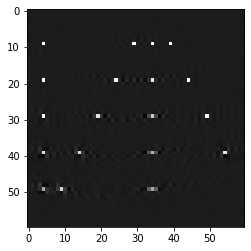

In [16]:
view(img)